Classifying Fruits and Vegetables Using Image Classification The given dataset contains images of a variety of fruits and vegetables, offering a rich source for developing and testing image recognition algorithms. The food items are categorized as follows: Fruits: Banana, Apple, Pear, Grapes, Orange, Kiwi, Watermelon, Pomegranate, Pineapple, Mango Vegetables: Cucumber, Carrot, Capsicum, Onion, Potato, Lemon, Tomato, Radish, Beetroot, Cabbage, Lettuce, Spinach, Soybean, Cauliflower, Bell Pepper, Chilly, Pepper, Turnip, Corn, Sweetcorn, Sweet Potato, Paprika, Jalapeño, Ginger, Garlic, Peas, Eggplant Given this dataset, your task is to create a machine learning model that can classify the images into two main categories: Fruits and Vegetables.

In [ ]:
import cv2                                    #import libraries
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from google.colab import files                                          # loading data from kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rekharmt12","key":"3d535e14cdc7eb5fdad7410d9c596b3b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 98% 1.95G/1.98G [00:16<00:01, 33.2MB/s]
100% 1.98G/1.98G [00:16<00:00, 131MB/s] 


In [ ]:
!unzip -q fruit-and-vegetable-image-recognition.zip -d fruit-and-vegetable-image-recognition

In [ ]:
import os

# Check top-level contents
base_dir = "/content/fruit-and-vegetable-image-recognition"
print("Top-level folders and files:")
print(os.listdir(base_dir))

Top-level folders and files:
['test', 'validation', 'train']


In [ ]:
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir  = os.path.join(base_dir,"validation")
# List categories in training folder
print("\nCategories in train folder:")
print(os.listdir(train_dir))

# List categories in test folder
print("\nCategories in test folder:")
print(os.listdir(test_dir))
# List categories in validation folder
print("\nCategories in validation folder:")
print(os.listdir(val_dir))



Categories in train folder:
['watermelon', 'potato', 'onion', 'pineapple', 'cauliflower', 'pomegranate', 'orange', 'chilli pepper', 'apple', 'peas', 'raddish', 'soy beans', 'spinach', 'garlic', 'bell pepper', 'kiwi', 'cucumber', 'corn', 'mango', 'pear', 'sweetcorn', 'tomato', 'paprika', 'sweetpotato', 'ginger', 'eggplant', 'turnip', 'cabbage', 'capsicum', 'jalepeno', 'carrot', 'banana', 'beetroot', 'lettuce', 'grapes', 'lemon']

Categories in test folder:
['watermelon', 'potato', 'onion', 'pineapple', 'cauliflower', 'pomegranate', 'orange', 'chilli pepper', 'apple', 'peas', 'raddish', 'soy beans', 'spinach', 'garlic', 'bell pepper', 'kiwi', 'cucumber', 'corn', 'mango', 'pear', 'sweetcorn', 'tomato', 'paprika', 'sweetpotato', 'ginger', 'eggplant', 'turnip', 'cabbage', 'capsicum', 'jalepeno', 'carrot', 'banana', 'beetroot', 'lettuce', 'grapes', 'lemon']

Categories in validation folder:
['watermelon', 'potato', 'onion', 'pineapple', 'cauliflower', 'pomegranate', 'orange', 'chilli pepper

In [ ]:
categories = os.listdir(train_dir)
print(f"There are {len(categories)} types of fruits and vegetables:\n{categories}")

There are 36 types of fruits and vegetables:
['watermelon', 'potato', 'onion', 'pineapple', 'cauliflower', 'pomegranate', 'orange', 'chilli pepper', 'apple', 'peas', 'raddish', 'soy beans', 'spinach', 'garlic', 'bell pepper', 'kiwi', 'cucumber', 'corn', 'mango', 'pear', 'sweetcorn', 'tomato', 'paprika', 'sweetpotato', 'ginger', 'eggplant', 'turnip', 'cabbage', 'capsicum', 'jalepeno', 'carrot', 'banana', 'beetroot', 'lettuce', 'grapes', 'lemon']


In [ ]:
def count_images_per_category(directory):
    total_images = 0
    category_counts = {}
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            image_files = [ image_name for image_name in os.listdir(category_path)]
            len_category = len(image_files)
            category_counts[category] = len_category
            total_images += len_category

    return total_images, category_counts
    # get number of images found
train_total, train_cat_counts = count_images_per_category(train_dir)
val_total, val_cat_counts = count_images_per_category(val_dir)
test_total, test_cat_counts = count_images_per_category(test_dir)

print(f"\nTrain set: {train_total} images")
for cat, count in train_cat_counts.items():
    print(f" - {cat}: {count}")

print(f"\nValidation set: {val_total} images")
for cat, count in val_cat_counts.items():
    print(f" - {cat}: {count}")

print(f"\nTest set: {test_total} images")
for cat, count in test_cat_counts.items():
    print(f" - {cat}: {count}")



Train set: 3115 images
 - watermelon: 84
 - potato: 77
 - onion: 94
 - pineapple: 99
 - cauliflower: 79
 - pomegranate: 79
 - orange: 69
 - chilli pepper: 87
 - apple: 68
 - peas: 100
 - raddish: 81
 - soy beans: 97
 - spinach: 97
 - garlic: 92
 - bell pepper: 90
 - kiwi: 88
 - cucumber: 94
 - corn: 87
 - mango: 86
 - pear: 89
 - sweetcorn: 91
 - tomato: 92
 - paprika: 83
 - sweetpotato: 69
 - ginger: 68
 - eggplant: 84
 - turnip: 98
 - cabbage: 92
 - capsicum: 89
 - jalepeno: 88
 - carrot: 82
 - banana: 75
 - beetroot: 88
 - lettuce: 97
 - grapes: 100
 - lemon: 82

Validation set: 351 images
 - watermelon: 10
 - potato: 10
 - onion: 10
 - pineapple: 10
 - cauliflower: 10
 - pomegranate: 10
 - orange: 9
 - chilli pepper: 9
 - apple: 10
 - peas: 10
 - raddish: 9
 - soy beans: 10
 - spinach: 10
 - garlic: 10
 - bell pepper: 9
 - kiwi: 10
 - cucumber: 10
 - corn: 10
 - mango: 10
 - pear: 10
 - sweetcorn: 10
 - tomato: 10
 - paprika: 10
 - sweetpotato: 10
 - ginger: 10
 - eggplant: 10
 - 

3115 images for training
351 images for validation
359 images for test

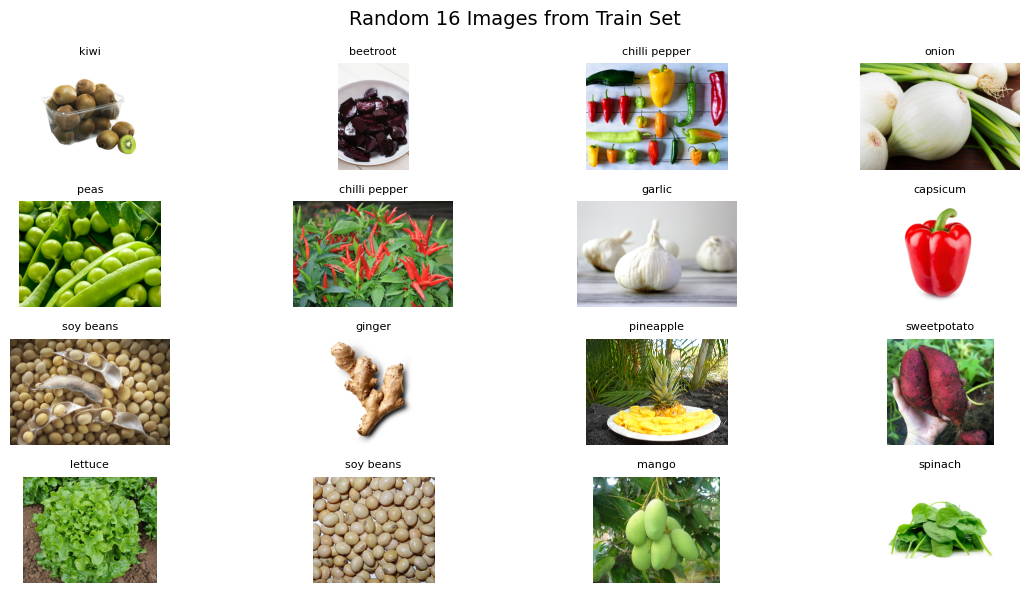

In [ ]:
def get_random_images_from_dir(directory, num_images=16):
    images = []

    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        image_names = os.listdir(category_path)
        for image_name in image_names:
                image_path = os.path.join(category_path, image_name)
                if os.path.isfile(image_path): # if loaded successfully
                    images.append((image_path, category))
    return random.sample(images, min(num_images, len(images)))

def show_images(images, title):
    plt.figure(figsize=(12,6))
    for i, (image_path, label) in enumerate(images):
        plt.subplot(4, 4, i + 1)
        try:
            image = Image.open(image_path).convert("RGB")
            plt.imshow(image)
            plt.title(label, fontsize=8)
            plt.axis('off')
        except:
           plt.title("Error", fontsize=8)
           plt.axis('off')
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

train_images = get_random_images_from_dir(train_dir, num_images=16)
show_images(train_images, "Random 16 Images from Train Set")


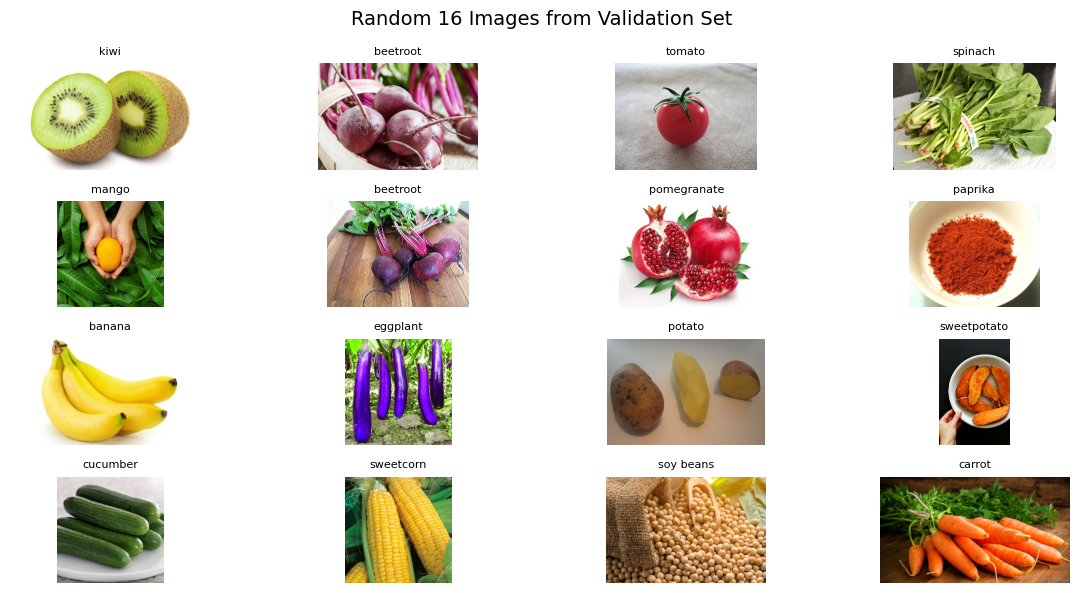

In [ ]:
val_images = get_random_images_from_dir(val_dir, num_images=16)
show_images(val_images, "Random 16 Images from Validation Set")

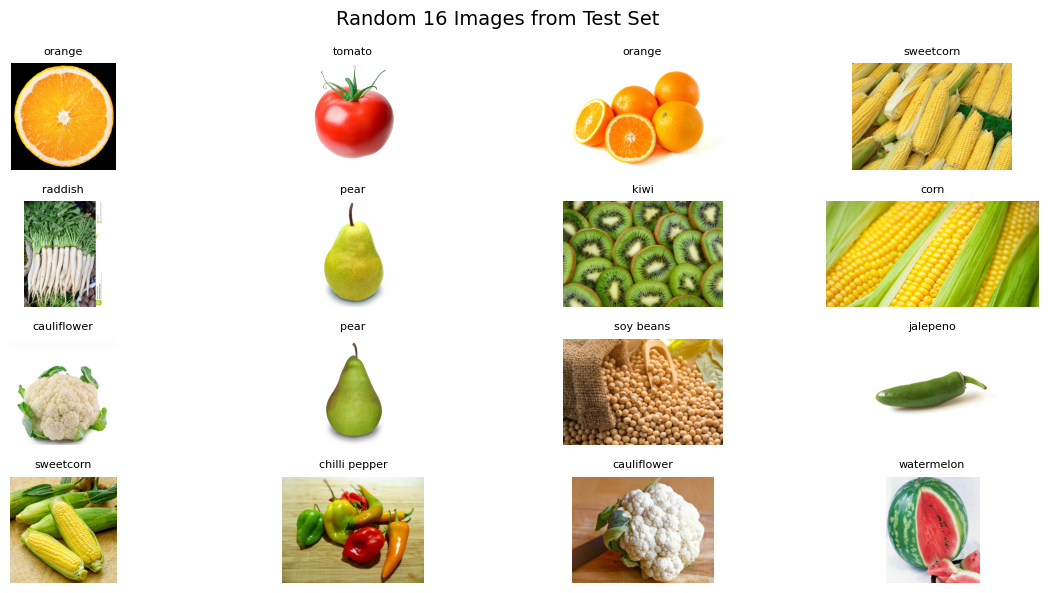

In [ ]:
test_images = get_random_images_from_dir(test_dir, num_images=16)
show_images(test_images, "Random 16 Images from Test Set")

In [ ]:
def find_corrupted_images(directory):
    corrupted_images = []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if not os.path.isdir(category_path):
            continue
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            try:
                with Image.open(file_path) as img:
                    img.verify()  #verify if the image is valid and complete with pillow
            except Exception as e:
                corrupted_images.append(file_path)
    return corrupted_images


train_corrupted = find_corrupted_images(train_dir)
val_corrupted = find_corrupted_images(val_dir)
test_corrupted = find_corrupted_images(test_dir)

print(f"Corrupted images in train set: {len(train_corrupted)}")
print(f"Corrupted images in validation set: {len(val_corrupted)}")
print(f"Corrupted images in test set: {len(test_corrupted)}")

for path in train_corrupted + val_corrupted + test_corrupted:
    print("Corrupted:", path)

Corrupted images in train set: 0
Corrupted images in validation set: 0
Corrupted images in test set: 0


preprocessing

In [ ]:
image_path = "/content/fruit-and-vegetable-image-recognition/train/apple/Image_1.jpg"
original_image = Image.open(image_path).convert('RGB')

# we convert PIL to NumPy to check original pixel range
original_np = np.array(original_image)
print("Before applying ToTensor(), pixel values are:")
print(f"Min: {original_np.min()}, Max: {original_np.max()}")

# apply ToTensor
to_tensor = transforms.ToTensor()
tensor_img = to_tensor(original_image)
print("\nAfter ToTensor(), values are between:")
print(f"Min: {tensor_img.min().item():.4f}, Max: {tensor_img.max().item():.4f}")

Before applying ToTensor(), pixel values are:
Min: 0, Max: 255

After ToTensor(), values are between:
Min: 0.0000, Max: 1.0000


So no need for scaling as the method ToTensor() does it itself automatically

In [ ]:
image_size = 128  # depending on your CNN input
batch_size = 32

transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset   = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset  = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class_names = train_dataset.classes
num_classes = len(class_names)

print(f"There are {num_classes} Classes: {class_names}")


There are 36 Classes: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [ ]:
class FruitVegCNN(nn.Module):
    def __init__(self, num_classes):
        super(FruitVegCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)  # Assuming 128x128 input size
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # [B, 32, 64, 64]
        x = self.pool(F.relu(self.conv2(x)))   # [B, 64, 32, 32]
        x = x.view(x.size(0), -1)              # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #cuda to use gpu
model = FruitVegCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from tqdm import tqdm

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]", leave=False)

    for images, labels in train_loader_tqdm:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)


        train_loader_tqdm.set_postfix(loss=loss.item())

    train_accuracy = 100 * correct_train / total_train

    # Validation
    model.eval()
    correct_val = 0
    total_val = 0

    val_loader_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]", leave=False)

    with torch.no_grad():
        for images, labels in val_loader_tqdm:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_accuracy = 100 * correct_val / total_val

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Loss: {running_loss/len(train_loader):.4f} | "
          f"Train Acc: {train_accuracy:.2f}% | "
          f"Val Acc: {val_accuracy:.2f}%")


Epoch 1/10 [Training]:   7%|▋         | 7/98 [00:15<03:23,  2.24s/it, loss=3.6]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10 | Loss: 3.4611 | Train Acc: 6.36% | Val Acc: 19.37%


Epoch 2/10 | Loss: 2.8001 | Train Acc: 18.65% | Val Acc: 41.88%


Epoch 3/10 | Loss: 2.3541 | Train Acc: 29.89% | Val Acc: 61.82%


Epoch 4/10 | Loss: 1.9383 | Train Acc: 42.05% | Val Acc: 76.35%


Epoch 5/10 | Loss: 1.5509 | Train Acc: 52.84% | Val Acc: 85.75%


Epoch 6/10 | Loss: 1.1526 | Train Acc: 64.14% | Val Acc: 91.45%


Epoch 7/10 | Loss: 0.8474 | Train Acc: 73.23% | Val Acc: 93.45%


Epoch 8/10 | Loss: 0.6249 | Train Acc: 80.48% | Val Acc: 94.02%


Epoch 9/10 | Loss: 0.4880 | Train Acc: 84.65% | Val Acc: 94.30%


Epoch 10/10 | Loss: 0.4141 | Train Acc: 86.97% | Val Acc: 95.16%


In [ ]:
model.eval()  # Set to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 95.26%


In [ ]:
model.eval()  # Set to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 95.26%


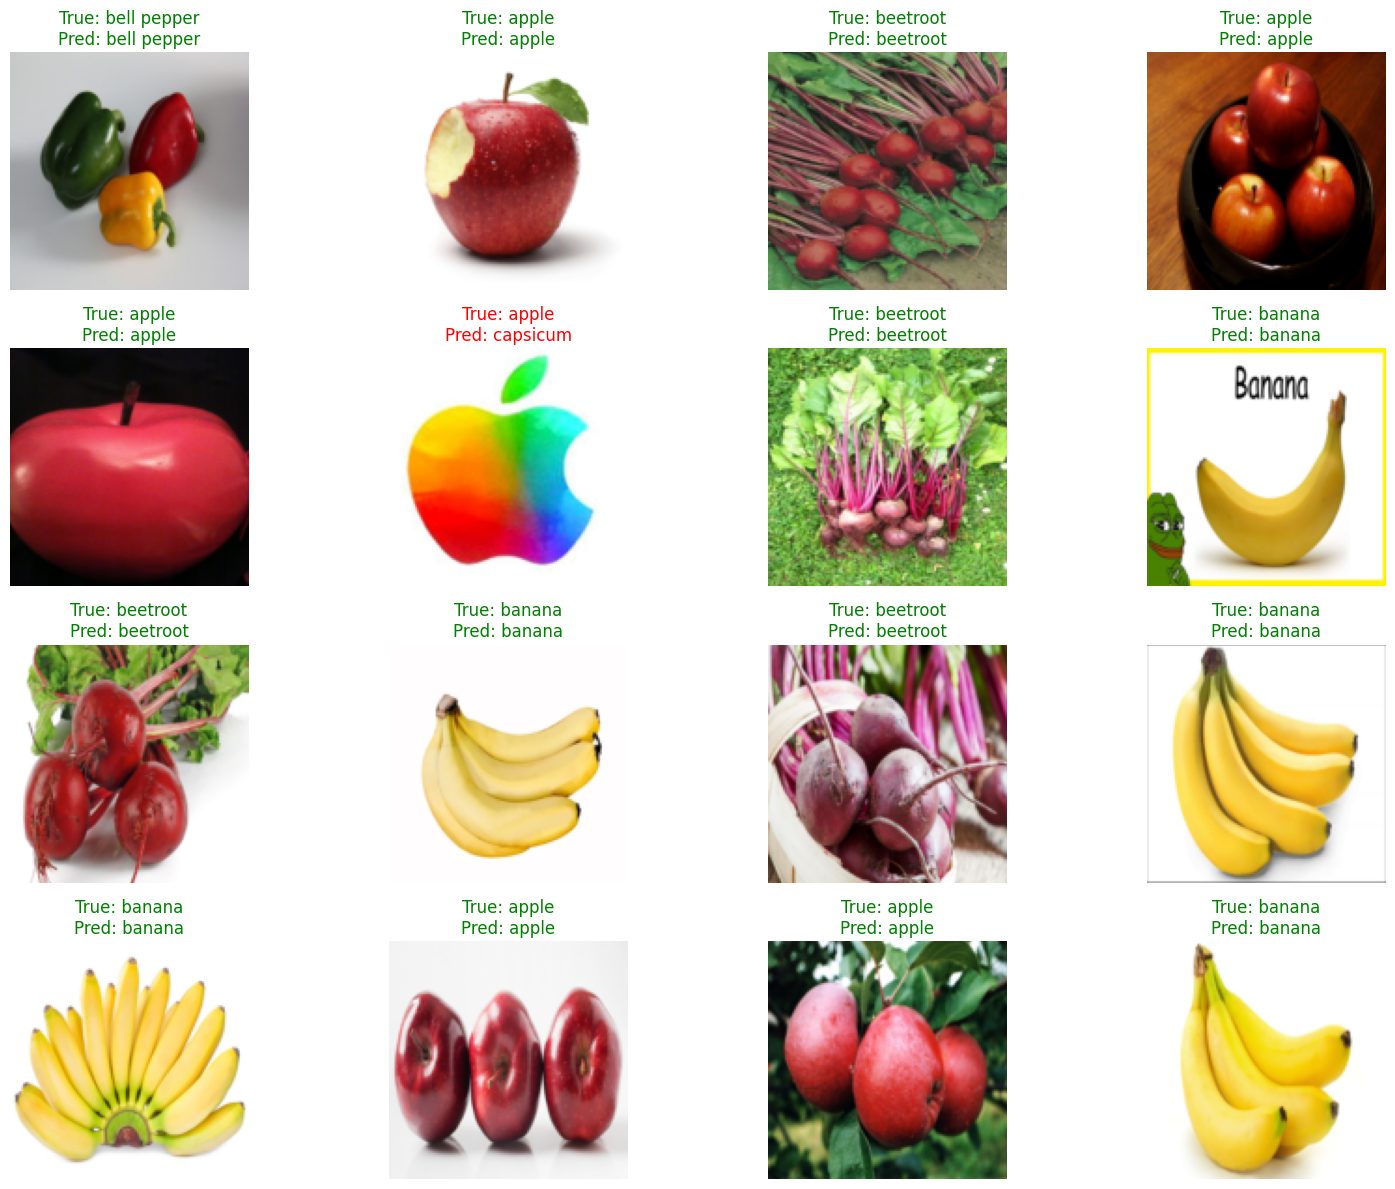

In [ ]:
model.eval()
# getting 1 batch of test data
data_iter = iter(test_loader)
images, labels = next(data_iter)

images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Select 16 random images to plot predictions
indices = random.sample(range(len(images)), 16)

plt.figure(figsize=(16, 12))
for i, idx in enumerate(indices):
    img = images[idx].cpu()
    label = labels[idx].item()
    pred = preds[idx].item()

    # Unnormalize the image
    img = img * 0.5 + 0.5  # reverse normalization
    img = img.permute(1, 2, 0).numpy()  # C x H x W → H x W x C

    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.title(f"True: {class_names[label]}\nPred: {class_names[pred]}", color='green' if label == pred else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()